In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, silhouette_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
###### Q1

In [50]:
########  a

In [51]:
titanic = pd.read_csv("Titanic-Dataset.csv",index_col=0)
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [52]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [53]:
##### a 

In [54]:
print(titanic['Sex'].value_counts())
print(titanic['SibSp'].value_counts())
print(titanic['Parch'].value_counts())
print(titanic['Embarked'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [55]:
titanic['Sex_male'] = pd.get_dummies(titanic['Sex'],drop_first = True)
titanic.drop("Sex",axis=1,inplace=True)
titanic.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,False
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,False
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,True


In [56]:
######## b

In [57]:
titanic.isna().sum()

Survived      0
Pclass        0
Name          0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Sex_male      0
dtype: int64

In [37]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
ct = make_column_transformer(("passthrough",make_column_selector(dtype_include = object)),
                             (imp_mean,make_column_selector(dtype_include = ["int64","float64"])),
                             verbose_feature_names_out=False).set_output(transform='pandas')
dum_np = ct.fit_transform(titanic)
dum_np

,Name,Ticket,Cabin,Embarked,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,,,,,
1,"Braund, Mr. Owen Harris",A/5 21171,NaN,S,0.0,3.0,22.000000,1.0,0.0,7.2500
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85,C,1.0,1.0,38.000000,1.0,0.0,71.2833
3,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN,S,1.0,3.0,26.000000,0.0,0.0,7.9250
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123,S,1.0,1.0,35.000000,1.0,0.0,53.1000
5,"Allen, Mr. William Henry",373450,NaN,S,0.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...,...,...
887,"Montvila, Rev. Juozas",211536,NaN,S,0.0,2.0,27.000000,0.0,0.0,13.0000
888,"Graham, Miss. Margaret Edith",112053,B42,S,1.0,1.0,19.000000,0.0,0.0,30.0000
889,"Johnston, Miss. Catherine Helen ""Carrie""",W./C. 6607,NaN,S,0.0,3.0,29.699118,1.0,2.0,23.4500


In [39]:
dum_np.isna().sum()

Name          0
Ticket        0
Cabin       687
Embarked      2
Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
dtype: int64

In [8]:
########## Q2

In [ ]:
######## a

In [40]:
titanic = pd.read_csv("Titanic-Dataset.csv",index_col=0)
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [41]:
female_titanic = titanic[titanic['Sex']=='female']
female_titanic.drop(['Name','Ticket','Cabin'],inplace=True,axis=1)
female_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 314 entries, 2 to 889
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  314 non-null    int64  
 1   Pclass    314 non-null    int64  
 2   Sex       314 non-null    object 
 3   Age       261 non-null    float64
 4   SibSp     314 non-null    int64  
 5   Parch     314 non-null    int64  
 6   Fare      314 non-null    float64
 7   Embarked  312 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 22.1+ KB


C:\Users\Administrator.DAI-PC2\AppData\Local\Temp\ipykernel_16600\1827072728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_titanic.drop(['Name','Ticket','Cabin'],inplace=True,axis=1)


In [42]:
impute_age = SimpleImputer(strategy='mean').set_output(transform='pandas')
impute_embarked = SimpleImputer(strategy='most_frequent').set_output(transform='pandas')

ct = make_column_transformer((impute_age,['Age']),(impute_embarked,['Embarked']),remainder='passthrough',verbose_feature_names_out=False).set_output(transform='pandas')
titanic_fe = ct.fit_transform(female_titanic)
titanic_fe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 314 entries, 2 to 889
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       314 non-null    float64
 1   Embarked  314 non-null    object 
 2   Survived  314 non-null    int64  
 3   Pclass    314 non-null    int64  
 4   Sex       314 non-null    object 
 5   SibSp     314 non-null    int64  
 6   Parch     314 non-null    int64  
 7   Fare      314 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 22.1+ KB


In [43]:
X = pd.get_dummies(titanic_fe.drop('Survived',axis=1),drop_first=True)
y = titanic_fe['Survived']

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=24, stratify=y)

In [45]:
rf = RandomForestClassifier(random_state=24)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
print(accuracy_score(y_test,y_pred))

y_pred_prob = rf.predict_proba(X_test)
print(log_loss(y_test,y_pred_prob))

0.8105263157894737
0.41794481108402537


In [46]:
########### b

In [47]:
confusion_matrix(y_test,y_pred)

array([[12, 13],
       [ 5, 65]], dtype=int64)

In [48]:
######## c

In [49]:
rf = RandomForestClassifier(random_state=24)
kfold = StratifiedKFold(n_splits=5,shuffle=True, random_state=24)
params = {'max_depth':[None,2,3],'min_samples_split':[2,10,15],'min_samples_leaf':[1,5,9]}
gcv = GridSearchCV(rf,param_grid=params,cv=kfold,scoring='neg_log_loss')

gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
-0.4149320077243558


In [ ]:
### Q3

In [97]:
iris = load_iris()
df = pd.DataFrame(data = iris.data,columns=iris.feature_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [109]:
scaler = StandardScaler().set_output(transform='pandas')
iris_scaled = scaler.fit_transform(df)

Ks = np.arange(2,8)
scores = []
for i in Ks:
    clust = KMeans(n_clusters=i,random_state=24,init='random')
    clust.fit(iris_scaled)
    scores.append(silhouette_score(iris_scaled, clust.labels_))

i_max = np.argmax(scores)
print("Best no. of clusters:", Ks[i_max])
print("Best Score:", scores[i_max])

C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:14

Best no. of clusters: 2
Best Score: 0.5817500491982808


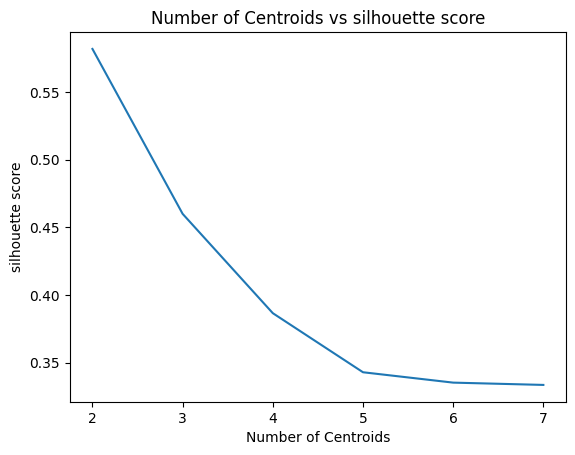

In [111]:
plt.plot(Ks,scores)
plt.title("Number of Centroids vs silhouette score")
plt.xlabel('Number of Centroids')
plt.ylabel('silhouette score')
plt.show()

From results, it is observed that silhouette score is maximum for centroids = 2.  Using elbow method, from graph it is observed that number of centroids = 4.